In [1]:
from IPython.display import IFrame

### **Indian Statewise average analysis of No2,So2,RSPM,SPM**

In [2]:
IFrame('https://public.tableau.com/views/IndianAIQINDIAMAP/StatewiseIndiaAQI?:embed=y&:showVizHome=no', width=1150, height=925)
#https://public.tableau.com/views/IndianAIQINDIAMAP/StatewiseIndiaAQI?:embed=y&:display_count=yes&publish=yes


### **Indian states citywise average analysis of No2,So2,RSPM,SPM**

In [3]:
IFrame('https://public.tableau.com/views/IndianAIQINDIAMAPCity/StatewiseIndiaAQICity?:embed=y&:showVizHome=no', width=1150, height=925)


### **Importing Required Libraries**

In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("fivethirtyeight")

import warnings 
warnings.filterwarnings('ignore')

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

import seaborn as sns
 



ModuleNotFoundError: No module named 'plotly'

In [8]:
df = pd.read_csv(r"C:\Users\user\Desktop\portfolio -E\Exploratory Analysis of India's  Air Quality based on Tableau\data.csv", encoding="ISO-8859-1")
df.rename(columns={'stn_code': 'station_code', 'location': 'city', 'type': 'area_type', 'location_monitoring_station': 'monitoring_station'}, inplace=True)
df.head()

,station_code,sampling_date,state,city,agency,area_type,so2,no2,rspm,spm,monitoring_station,pm2_5,date
0,150,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


### **Split date column to year,month and day**

In [9]:
# df["date"] = df["date"].astype("str")
df_time = df.date.str.split("-",expand=True)
df_time.columns = ["year","month","day"]
df = df.join(df_time)
df.head()

,station_code,sampling_date,state,city,agency,area_type,so2,no2,rspm,spm,monitoring_station,pm2_5,date,year,month,day
0,150,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01,1990,02,01
1,151,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01,1990,02,01
2,152,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01,1990,02,01
3,150,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01,1990,03,01
4,151,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01,1990,03,01


### **Fill zero values in field year,month and day**

In [10]:
for i in ["year","month","day"]:
    df[i] = df[i].fillna(0)

df[["year","month","day"]].isnull().sum()

year     0
month    0
day      0
dtype: int64

### **Checking missing values in data**

Text(0.5, 1.0, 'Missing Value in Dataset')

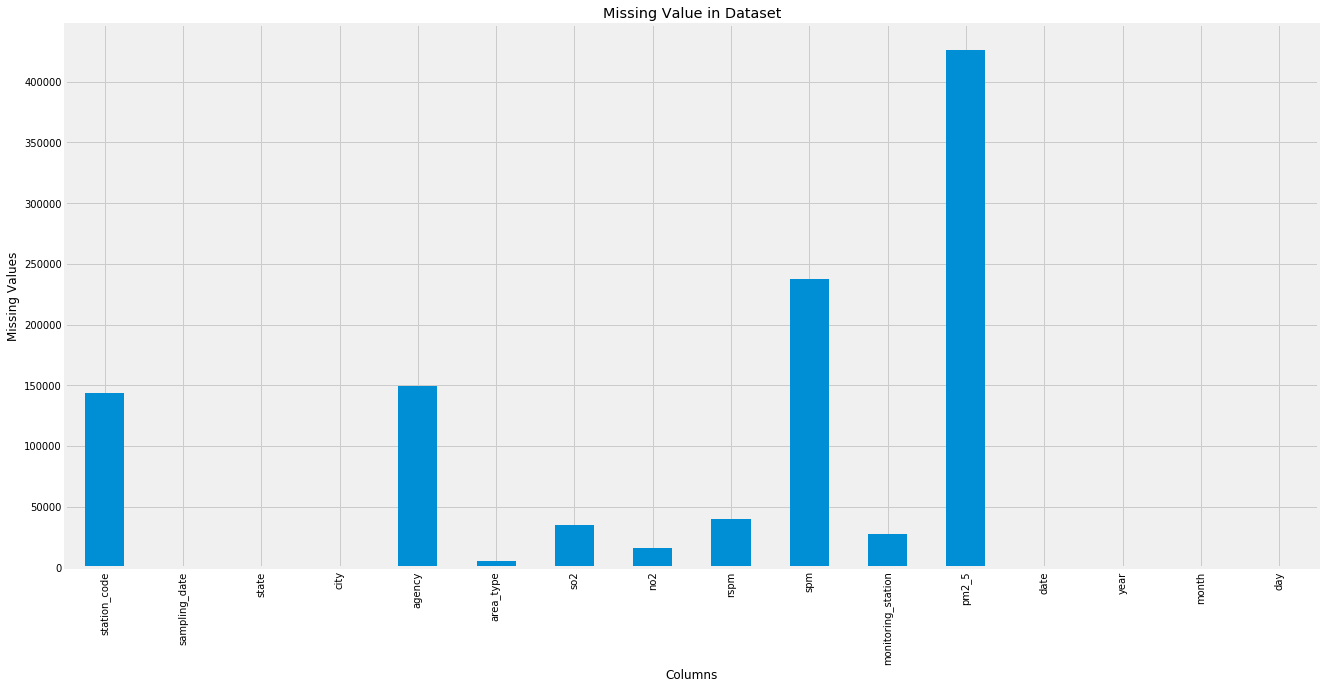

In [11]:
df.isnull().sum().plot(kind="bar", figsize=(20,10))
plt.xlabel("Columns")
plt.ylabel("Missing Values")
plt.title("Missing Value in Dataset")

# Fill the Missing Value

** Fill missing values of column type float/int using mean of respective column**

In [12]:
for i in df.select_dtypes(include = ['float64','int64']):
    df[i] = df[i].fillna(np.mean(df[i]))

Text(0.5, 1.0, 'Missing Value in Dataset')

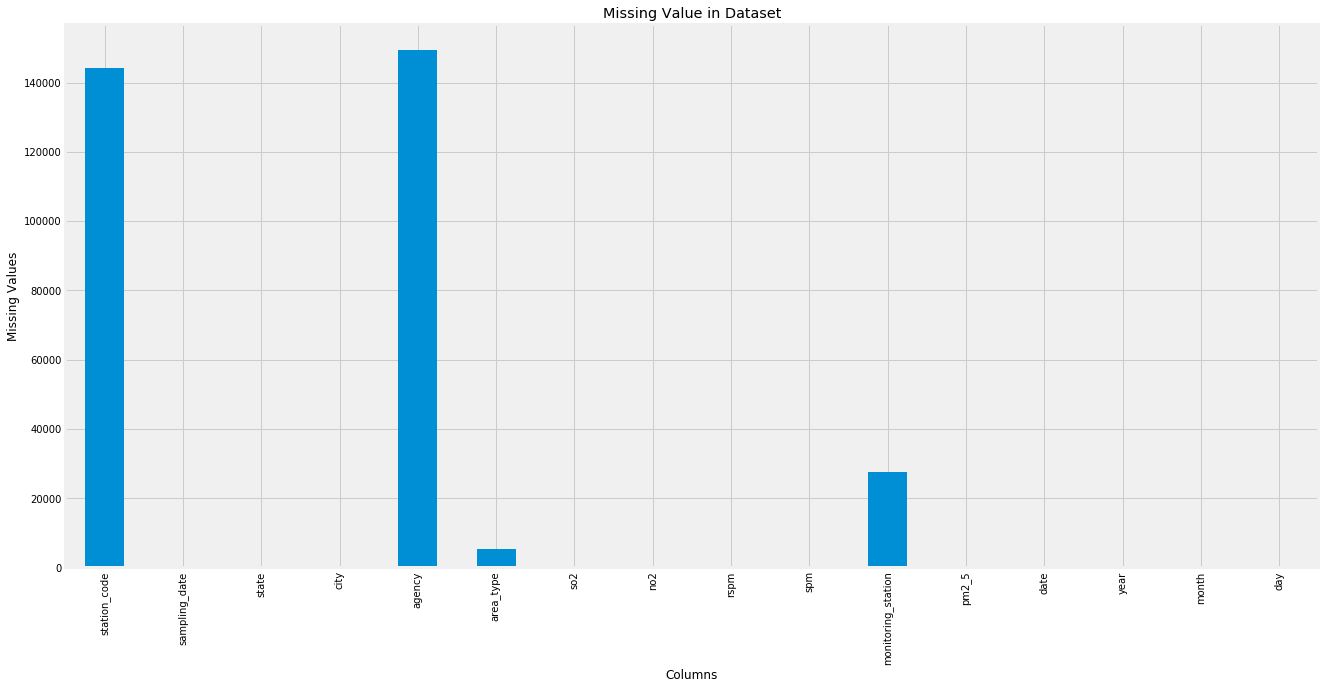

In [13]:
df.isnull().sum().plot(kind="bar", figsize=(20,10))
plt.xlabel("Columns")
plt.ylabel("Missing Values")
plt.title("Missing Value in Dataset")

** Object Type column filled with other**

In [14]:
for i in df.select_dtypes('object').columns:
    df[i] = df[i].fillna("other")

In [15]:
df.shape

(435742, 16)

### ** After preprocessing data we use Tableau for Visualization **

**What is sulfur dioxide(So2)?**

Sulfur dioxide is a gas. It is invisible and has a nasty, sharp smell. It reacts easily with other substances to form harmful compounds, such as sulfuric acid, sulfurous acid and sulfate particles.

About 99% of the sulfur dioxide in air comes from human sources. The main source of sulfur dioxide in the air is industrial activity that processes materials that contain sulfur, eg the generation of electricity from coal, oil or gas that contains sulfur. Some mineral ores also contain sulfur, and sulfur dioxide is released when they are processed. In addition, industrial activities that burn fossil fuels containing sulfur can be important sources of sulfur dioxide.

Sulfur dioxide is also present in motor vehicle emissions, as the result of fuel combustion. In the past, motor vehicle exhaust was an important, but not the main, source of sulfur dioxide in air. However, this is no longer the case.

**What is nitrogen dioxide(No2)?**

Nitrogen dioxide (NO2) is one of the nitrogen oxides (NOx), a group of air pollutants produced from combustion processes.

In urban outdoor air, the presence of NO2 is mainly due to traffic. Nitric oxide (NO), which is emitted by motor vehicles or other combustion processes, combines with oxygen in the atmosphere, producing NO2. Indoor NO2 is produced mainly by unvented heaters and gas stoves.

### ** High So2 and No2 statewise **
- Uttranchal,Jarkhand and Sikkim states have High So2 Emission
- WestBengal,Delhi and Jarkhand states have High No2 Emission

In [16]:

IFrame('https://public.tableau.com/views/IndianAIQStatewiseNo2So2/Dashboard1?:embed=y&:showVizHome=no', width=1000, height=925)


### ** High So2 and No2 citywise **
- Byrnihat,Gajroula and Jamshedpur city have High So2 Emission
- Howrah,Badlapur and Dombivli city have High No2 Emission

In [17]:
IFrame('https://public.tableau.com/views/IndianAIQCitywiseNo2So2/Citywiseso2No2?:embed=y&:showVizHome=no', width=1000, height=925)
#https://public.tableau.com/views/IndianAIQCitywiseNo2So2/Citywiseso2No2?:embed=y&:display_count=yes&publish=yes

### ** Area type wise So2 and No2 Anlaysis**

- RIRUO have more So2 Emission
- Industrial Areas have more No2 Emission

In [18]:
IFrame('https://public.tableau.com/views/IndianAIQStatewiseNo2So2/AreatypewiseSO2andNO2?:embed=y&:showVizHome=no', width=1000, height=250)
# https://public.tableau.com/views/IndianAIQStatewiseNo2So2/AreatypewiseSO2andNO2?:embed=y&:display_count=yes&publish=yes

### ** Per state year wise So2 Emission we just display 2008-2015**

In [19]:
IFrame('https://public.tableau.com/views/IndianAIQYearStatewiseSo2/YearwiseStateSo2Level?:embed=y&:showVizHome=no', width=1100, height=900)


### ** Per state year wise No2 Emission we just display 2008-2015**

In [20]:
IFrame('https://public.tableau.com/views/IndianAIQYearStatewiseNo2/YearwiseStateNo2Level?:embed=y&:showVizHome=no', width=1100, height=900)


**What is RSPM?**

RSPM is that fraction of TSPM which is readily inhaled by humans through their respiratory system and in general, considered as particulate matter with their diameter (aerodynamic) less than 2.5 micrometers. Larger particles would be filtered in the nasal duct.

**What is SPM?**

Suspended Particulate Matter (SPM) are microscopic solid or liquid matter suspended in Earth's atmosphere. The term aerosol commonly refers to the particulate/air mixture, as opposed to the particulate matter alone.[3] Sources of particulate matter can be natural or anthropogenic. They have impacts on climate and precipitation that adversely affect human health.

### ** High RSPM and SPM statewise **
- Uttar Pradesh,Maharastra and Punjab states have High RSPM
- Mahrastra,Uttr Pradesh and Rajasthan states have High SPM

In [21]:
IFrame('https://public.tableau.com/views/IndianAIQStatewiseRSPMvsSPM/StatewiseRSPMandSPM?:embed=y&:showVizHome=no', width=1100, height=900)
#https://public.tableau.com/views/IndianAIQStatewiseRSPMvsSPM/StatewiseRSPMandSPM?:embed=y&:display_count=yes&publish=yes

### ** High RSPM and SPM citywise **
- Delhi,Kanpur and Ludhiana city have High RSPM
- Delhi,Kanpur and Agra city have High SPM

In [22]:
IFrame('https://public.tableau.com/views/IndianAIQCityRSPMvsSPM/CitywiseRSPMandSPM?:embed=y&:showVizHome=no', width=1100, height=900)


### ** Stay Connected For More Update!!!**